<p aling='center'>
  <img src="https://github.com/danilosl/Learning-CG/blob/main/img/UFPA.png?raw=true" alt="UFPA" width=100/>
  <img src="https://github.com/danilosl/Learning-CG/blob/main/img/ENGC.png?raw=true" alt="ENGC" width=100/>
  <p><b>SERVIÇO PÚBLICO FEDERAL<br>
  MINISTERIO DA EDUCAÇÃO<br>
  UNIVERSIDADE FEDERAL DO PARÁ<br>
  CAMPUS TUCURUÍ<br>
  ENGENHARIA DA COMPUTAÇÃO</b><br>
</p>

---
> **Disciplina**: Tópicos Especiais em Computadores I - Ciência de Dados<br>
> **Professor**: Dr. Adam Dreyton Ferreira dos Santos<br>
> **Aluno**: Danilo de Sousa Lopes<br>
> **Matrícula**: 201833840019<br>
> **Data**: 05/10/2022<br>
> **Projeto 2**: Visualização de Dados</br>
> **Repositório**: https://github.com/danilosl/Learning-DataScience
 

# **Setup**

In [119]:
from google.colab import drive
# montagem do drive
drive.mount('/content/drive')

# download dos datasets
!wget -q https://github.com/danilosl/Learning-DataScience/raw/main/Projeto2/Datasets/consumo_cerveja.csv

import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Pré-Processamento**

In [120]:
# carregando a base de dados
dados = pd.read_csv('/content/consumo_cerveja.csv', sep=',')
dados.head()

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,mes,dia_semana,dia
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,1,3,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,1,4,2
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,1,5,3
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,1,6,4
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,1,0,5


In [121]:
# obtendo as informações iniciais da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data                       365 non-null    object 
 1   Temperatura_Media_C        365 non-null    float64
 2   Temperatura_Minima_C       365 non-null    float64
 3   Temperatura_Maxima_C       365 non-null    float64
 4   Precipitacao_mm            365 non-null    float64
 5   Final_de_Semana            365 non-null    int64  
 6   Consumo_de_cerveja_litros  365 non-null    float64
 7   mes                        365 non-null    int64  
 8   dia_semana                 365 non-null    int64  
 9   dia                        365 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 28.6+ KB


In [122]:
# obtendo a descrição da base de dados
dados.describe()

,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,mes,dia_semana,dia
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,3.0,15.720548
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,2.0,8.808321
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,0.0,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,1.0,8.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,3.0,16.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,5.0,23.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,6.0,31.000000


In [123]:
#convertendo o tipo de dados da coluna data
dados['Data'] = pd.to_datetime(dados['Data'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data                       365 non-null    datetime64[ns]
 1   Temperatura_Media_C        365 non-null    float64       
 2   Temperatura_Minima_C       365 non-null    float64       
 3   Temperatura_Maxima_C       365 non-null    float64       
 4   Precipitacao_mm            365 non-null    float64       
 5   Final_de_Semana            365 non-null    int64         
 6   Consumo_de_cerveja_litros  365 non-null    float64       
 7   mes                        365 non-null    int64         
 8   dia_semana                 365 non-null    int64         
 9   dia                        365 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 28.6 KB


In [124]:
# alterando os rótulos dos dias da semana
dias_semana = {
    0 : 'Segunda',
    1 : 'Terça',
    2 : 'Quarta',
    3 : 'Quinta', 
    4 : 'Sexta', 
    5 : 'Sábado',
    6 : 'Domingo'
}
dados.dia_semana = dados.dia_semana.map(dias_semana)

In [125]:
# alterando os rótulos dos meses
mes = {
    1 : 'Janeiro',
    2 : 'Fevereiro',
    3 : 'Março',
    4 : 'Abril', 
    5 : 'Maio', 
    6 : 'Junho',
    7 : 'Julho',
    8 : 'Agosto',
    9 : 'Setembro',
    10 : 'Outubro',
    11 : 'Novembro',
    12 : 'Dezembro'
}
dados.mes = dados.mes.map(mes)

In [126]:
# verificando o resultado da troca de rótulos
dados.head(10)

,Data,Temperatura_Media_C,Temperatura_Minima_C,Temperatura_Maxima_C,Precipitacao_mm,Final_de_Semana,Consumo_de_cerveja_litros,mes,dia_semana,dia
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461,Janeiro,Quinta,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972,Janeiro,Sexta,2
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814,Janeiro,Sábado,3
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799,Janeiro,Domingo,4
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900,Janeiro,Segunda,5
5,2015-01-06,23.78,20.1,30.5,12.2,0,28.218,Janeiro,Terça,6
6,2015-01-07,24.00,19.5,33.7,0.0,0,29.732,Janeiro,Quarta,7
7,2015-01-08,24.90,19.5,32.8,48.6,0,28.397,Janeiro,Quinta,8
8,2015-01-09,28.20,21.9,34.0,4.4,0,24.886,Janeiro,Sexta,9
9,2015-01-10,26.76,22.1,34.2,0.0,1,37.937,Janeiro,Sábado,10


# **1. Um gráfico de pizza e outro de barras que evidencie o consumo de cerveja durante os dias úteis da semana e no final de semana.**

In [127]:
# separando os dados em grupos por dia da semana
group_dia_semana = dados.groupby('dia_semana')['Consumo_de_cerveja_litros'].sum()

# ordenando os dados
group_dia_semana.sort_values(ascending=False, inplace=True) 
group_dia_semana

dia_semana
Domingo    1508.391
Sábado     1499.572
Quinta     1276.057
Terça      1266.468
Sexta      1255.170
Quarta     1238.140
Segunda    1227.701
Name: Consumo_de_cerveja_litros, dtype: float64

In [128]:
# criando uma lista de cores para usar na geração dos gráficos
cores = ['maroon','firebrick','red','orangered','tomato','indianred','lightcoral','salmon','coral','lightsalmon','lightpink','mistyrose']

Text(0.5, 1.0, 'Comsumo total de cerveja por dias da semana do ano de 2015')

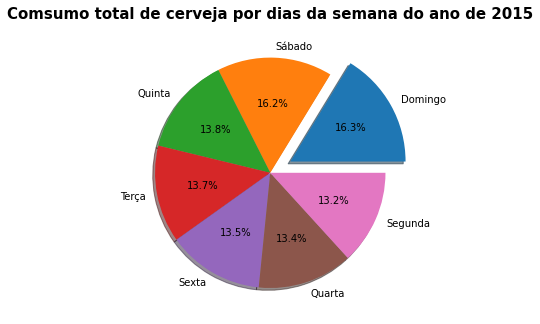

In [129]:
# criando um gráfico de pizza para relacionar o consumo de cerveja durante os dias úteis da semana e fins de semana
fig = plt. figure(figsize=(5,4))
eixo = fig.add_axes([0, 0, 1, 1])

explode = [0.2, 0, 0, 0, 0, 0, 0]

eixo.pie(group_dia_semana, labels=group_dia_semana.index, autopct='%.1f%%', explode=explode, shadow=True)
eixo.set_title('Comsumo total de cerveja por dias da semana do ano de 2015', fontsize=15, pad=10, weight='bold')

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Sábado'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Segunda')]

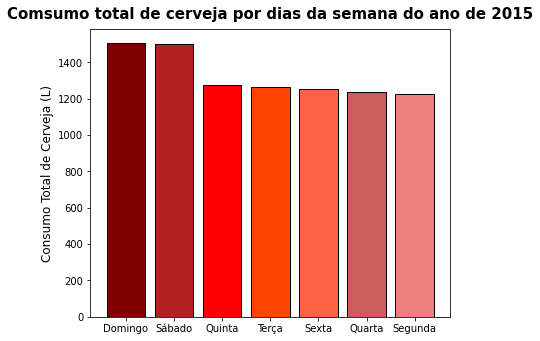

In [130]:
# criando um gráfico de barras para relacionar o consumo de cerveja durante os dias úteis da semana e fins de semana
fig = plt. figure(figsize=(5,4))
eixo = fig.add_axes([0, 0, 1, 1])

indice = range(len(group_dia_semana))

eixo.bar(indice, group_dia_semana, color = cores, edgecolor='k')
eixo.set_title('Comsumo total de cerveja por dias da semana do ano de 2015', fontsize=15, pad=10, weight='bold')
eixo.set_ylabel('Consumo Total de Cerveja (L)', fontsize=12)
eixo.set_xticks(indice)
eixo.set_xticklabels(group_dia_semana.index)

# **2. Um gráfico de barras que apresente o consumo total de cerveja mensal.**

In [131]:
# separando os dados em grupos de meses
group_mes = dados.groupby('mes')['Consumo_de_cerveja_litros'].sum()

# ordenando os dados
group_mes = group_mes[mes.values()]
group_mes

mes
Janeiro      889.007
Fevereiro    718.848
Março        776.128
Abril        738.723
Maio         706.750
Junho        708.812
Julho        699.759
Agosto       803.178
Setembro     755.944
Outubro      857.249
Novembro     774.846
Dezembro     842.255
Name: Consumo_de_cerveja_litros, dtype: float64

[Text(0, 0, 'Janeiro'),
 Text(0, 0, 'Fevereiro'),
 Text(0, 0, 'Março'),
 Text(0, 0, 'Abril'),
 Text(0, 0, 'Maio'),
 Text(0, 0, 'Junho'),
 Text(0, 0, 'Julho'),
 Text(0, 0, 'Agosto'),
 Text(0, 0, 'Setembro'),
 Text(0, 0, 'Outubro'),
 Text(0, 0, 'Novembro'),
 Text(0, 0, 'Dezembro')]

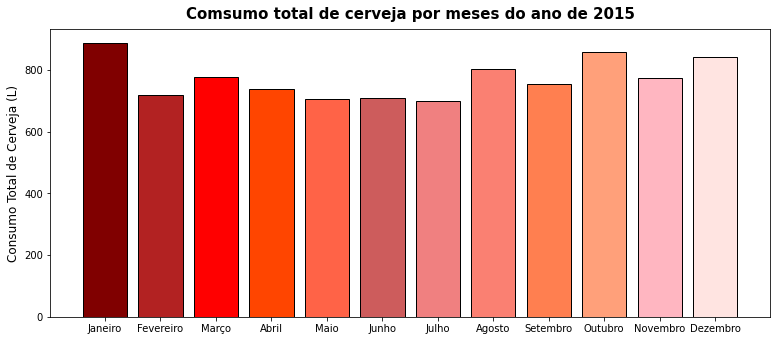

In [132]:
# criando um gráfico de barras para relacionar o consumo de cerveja total durante os meses
fig = plt. figure(figsize=(10,4))
eixo = fig.add_axes([0, 0, 1, 1])

indice = range(len(group_mes))

eixo.bar(indice, group_mes, color = cores, edgecolor='k')
eixo.set_title('Comsumo total de cerveja por meses do ano de 2015', fontsize=15, pad=10, weight='bold')
eixo.set_ylabel('Consumo Total de Cerveja (L)', fontsize=12)
eixo.set_xticks(indice)
eixo.set_xticklabels(group_mes.index)

# **3. Um gráfico que possa relacionar a temperatura média com o consumo de cerveja, e outro que relacione a precipitação com o consumo de cerveja.**

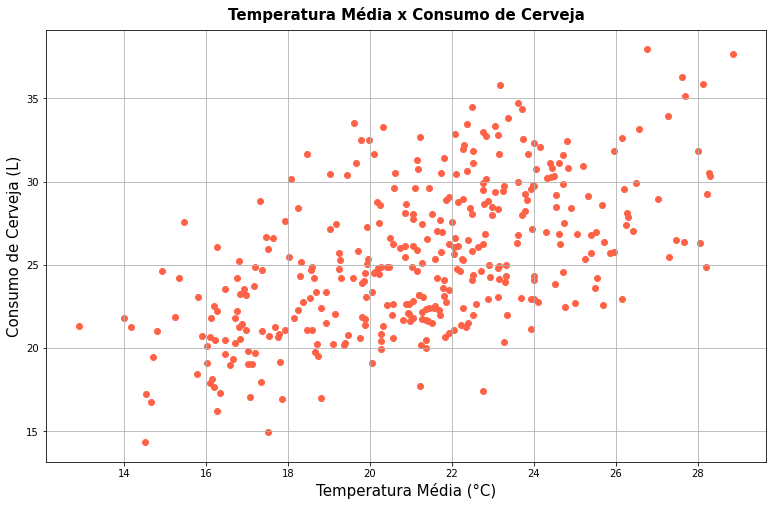

In [133]:
# gráfico que relaciona a temperatura média com o consumo de cerveja
fig = plt. figure(figsize=(10,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.scatter(dados['Temperatura_Media_C'], dados['Consumo_de_cerveja_litros'], color='tomato')
eixo.set_title('Temperatura Média x Consumo de Cerveja', fontsize=15, pad=10, weight='bold')
eixo.set_xlabel('Temperatura Média (°C)', fontsize=15)
eixo.set_ylabel('Consumo de Cerveja (L)', fontsize=15)
eixo.grid()

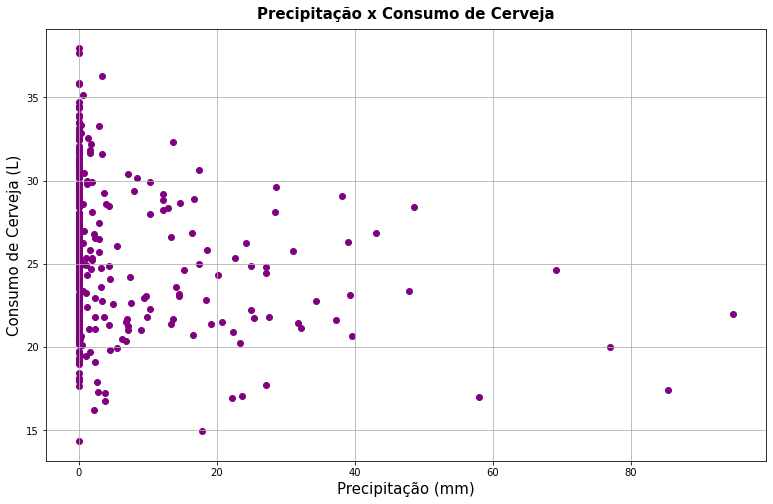

In [134]:
# gráfico que relaciona a precipitação com o consumo de cerveja
fig = plt. figure(figsize=(10,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.scatter(dados['Precipitacao_mm'], dados['Consumo_de_cerveja_litros'], color='purple')
eixo.set_title('Precipitação x Consumo de Cerveja', fontsize=15, pad=10, weight='bold')
eixo.set_xlabel('Precipitação (mm)', fontsize=15)
eixo.set_ylabel('Consumo de Cerveja (L)', fontsize=15)
eixo.grid()

# **4. Gráficos de barras que evidenciem o consumo de cerveja em cada mês.**

In [135]:
# criando uma lista de meses
meses = list(dados['mes'].unique())

# criando uma lista de dias
dias_semana = ['Segunda','Terça','Quinta', 'Quarta','Sexta','Sábado','Domingo']

# criando o filtro
sel = lambda mes: dados['mes'] == mes

In [136]:
# crindo uma lista de grupos
grupo_meses = []
for mes in meses:
  #filtragem e ordenação
  lista_nao_ordenada = dados[sel(mes)].groupby('dia_semana')['Consumo_de_cerveja_litros'].sum()
  lista_ordenada = lista_nao_ordenada[dias_semana]
  #criando a lista de grupos
  grupo_meses.append(lista_ordenada)

In [137]:
# visualização do grupo do mês de janeiro
grupo_meses[0]

dia_semana
Segunda    105.428
Terça      120.307
Quinta     128.073
Quarta     113.290
Sexta      132.425
Sábado     161.819
Domingo    127.665
Name: Consumo_de_cerveja_litros, dtype: float64

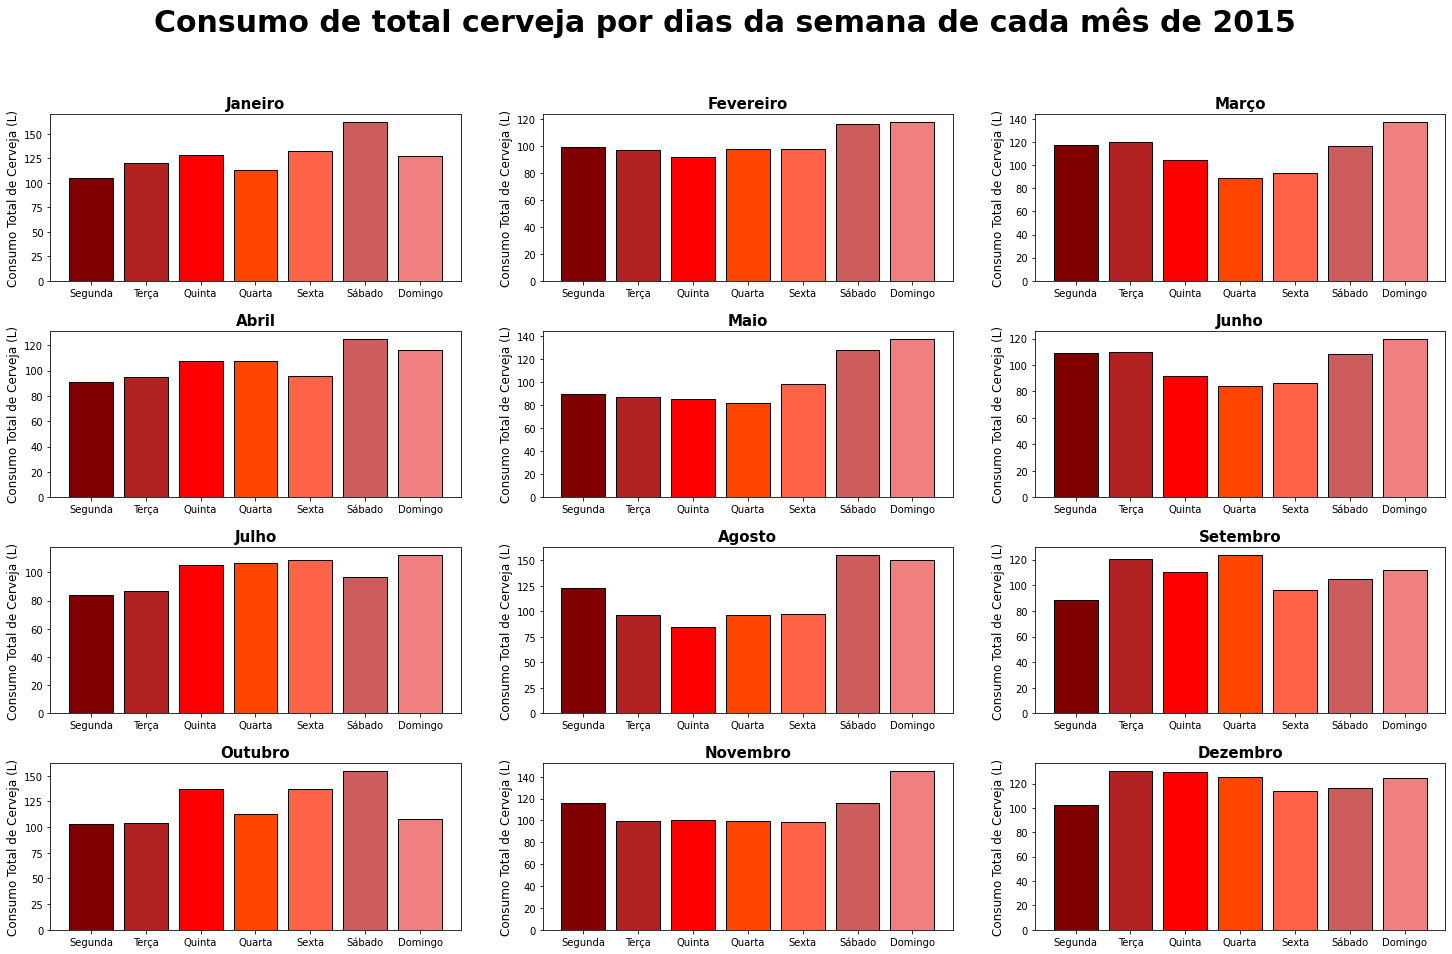

In [138]:
# gerando o gráficos com o consumo de cerveja total por meses
indice = range(len(dias_semana))
fig,axes = plt.subplots(4,3,figsize=(25,15))
fig.suptitle('Consumo de total cerveja por dias da semana de cada mês de 2015',fontsize=30, weight='bold') 
plt.subplots_adjust(hspace=0.30)
axes = axes.reshape(-1)       
for i in range(12):
  axes[i].bar(indice, grupo_meses[i], color = cores, edgecolor='k')
  axes[i].set_title(str(meses[i]),fontsize=15, weight='bold')
  axes[i].set_ylabel('Consumo Total de Cerveja (L)',fontsize=12)
  axes[i].set_xticks(indice)
  axes[i].set_xticklabels(dias_semana)
plt.show()